In [1]:
import sys
import pickle
import numpy as np
from PIL import Image
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [2]:
source_dir = "/media/tensor/EXTDRIVE/projects/virtual-try-on/dataset/lip_mpv_dataset/"

In [3]:
sys.path.append("/media/tensor/EXTDRIVE/projects/virtual-try-on/utils/densepose/detectron2/projects/DensePose")

In [4]:
from densepose.data.structures import DensePoseResult

In [5]:
def get_iuv_arr(pose_data):
    result_encoded = pose_data.results[0]
    iuv_arr = DensePoseResult.decode_png_data(*result_encoded)
    return iuv_arr

In [6]:
with open(source_dir +"lip.pkl", "rb") as f:
    dense_file = pickle.load(f)

In [14]:
# looping throuh all the dense data and saving them in dense folder as well as cropping images with bbox information
count = 0
for idx, dense in tqdm(enumerate(dense_file)):
    image_name = dense["file_name"].split("/")[-1]
    try:
        dense_info = get_iuv_arr(dense["pred_densepose"])
        np.save(source_dir + "lip_dense/" + image_name[:-4] + ".npy", dense_info)
        bbox = dense["pred_boxes_XYXY"][0].numpy()
        image = Image.open(source_dir + "lip_pairs/" + image_name)
        image = image.crop(bbox)
        image.save(source_dir + "lip_images/"+ image_name)
    except:
        count = count + 1
        print(idx)
        
print("total wrong counts")
print(count)


total wrong counts
0


In [7]:
dense_file[0]

{'file_name': 'lip_pairs/AN621DA76-Q11@8=person_half_front.jpg',
 'scores': tensor([0.9997]),
 'pred_boxes_XYXY': tensor([[  5.6770,   0.0000, 145.1995, 252.2390]]),
 'pred_densepose': <densepose.data.structures.DensePoseResult at 0x7f775007cbb0>}

In [8]:
x = get_iuv_arr(dense_file[0]["pred_densepose"])

In [9]:
x.shape

(3, 252, 139)

In [10]:
y = Image.open(source_dir + dense_file[0]["file_name"])

In [11]:
y.size

(160, 256)

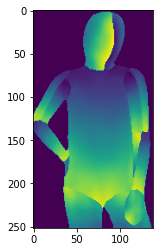

In [22]:
plt.imshow(x[1])

In [14]:
np.unique(x[1])

array([  0,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,
        16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
        29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
        42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,
        55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,
        68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
        94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106,
       107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119,
       120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132,
       133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145,
       146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158,
       159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171,
       172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 18